In [1]:
!nvidia-smi

Sat Nov  9 11:53:27 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip uninstall ultralytics -y
!pip install ultralytics --no-cache-dir --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 22.7 MB/s eta 0:00:00a 0:00:01


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="t4DiHJzpmpEnGCNNSHwd")
project = rf.workspace("monkey-3byip").project("monkey-l6seo")
version = project.version(11)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Monkey-11 in yolov11:: 100%|██████████| 6772/6772 [00:00<00:00, 7160.62it/s]


In [6]:
dataset.location

'/kaggle/working/Monkey-11'

In [7]:
!yolo task=detect mode=train model='/content/yolo11m.pt' data={dataset.location}/data.yaml epochs=50 imgsz=640

100%|███████████████████████████████████████| 38.8M/38.8M [00:00<00:00, 245MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11m.pt, data=/kaggle/working/Monkey-11/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

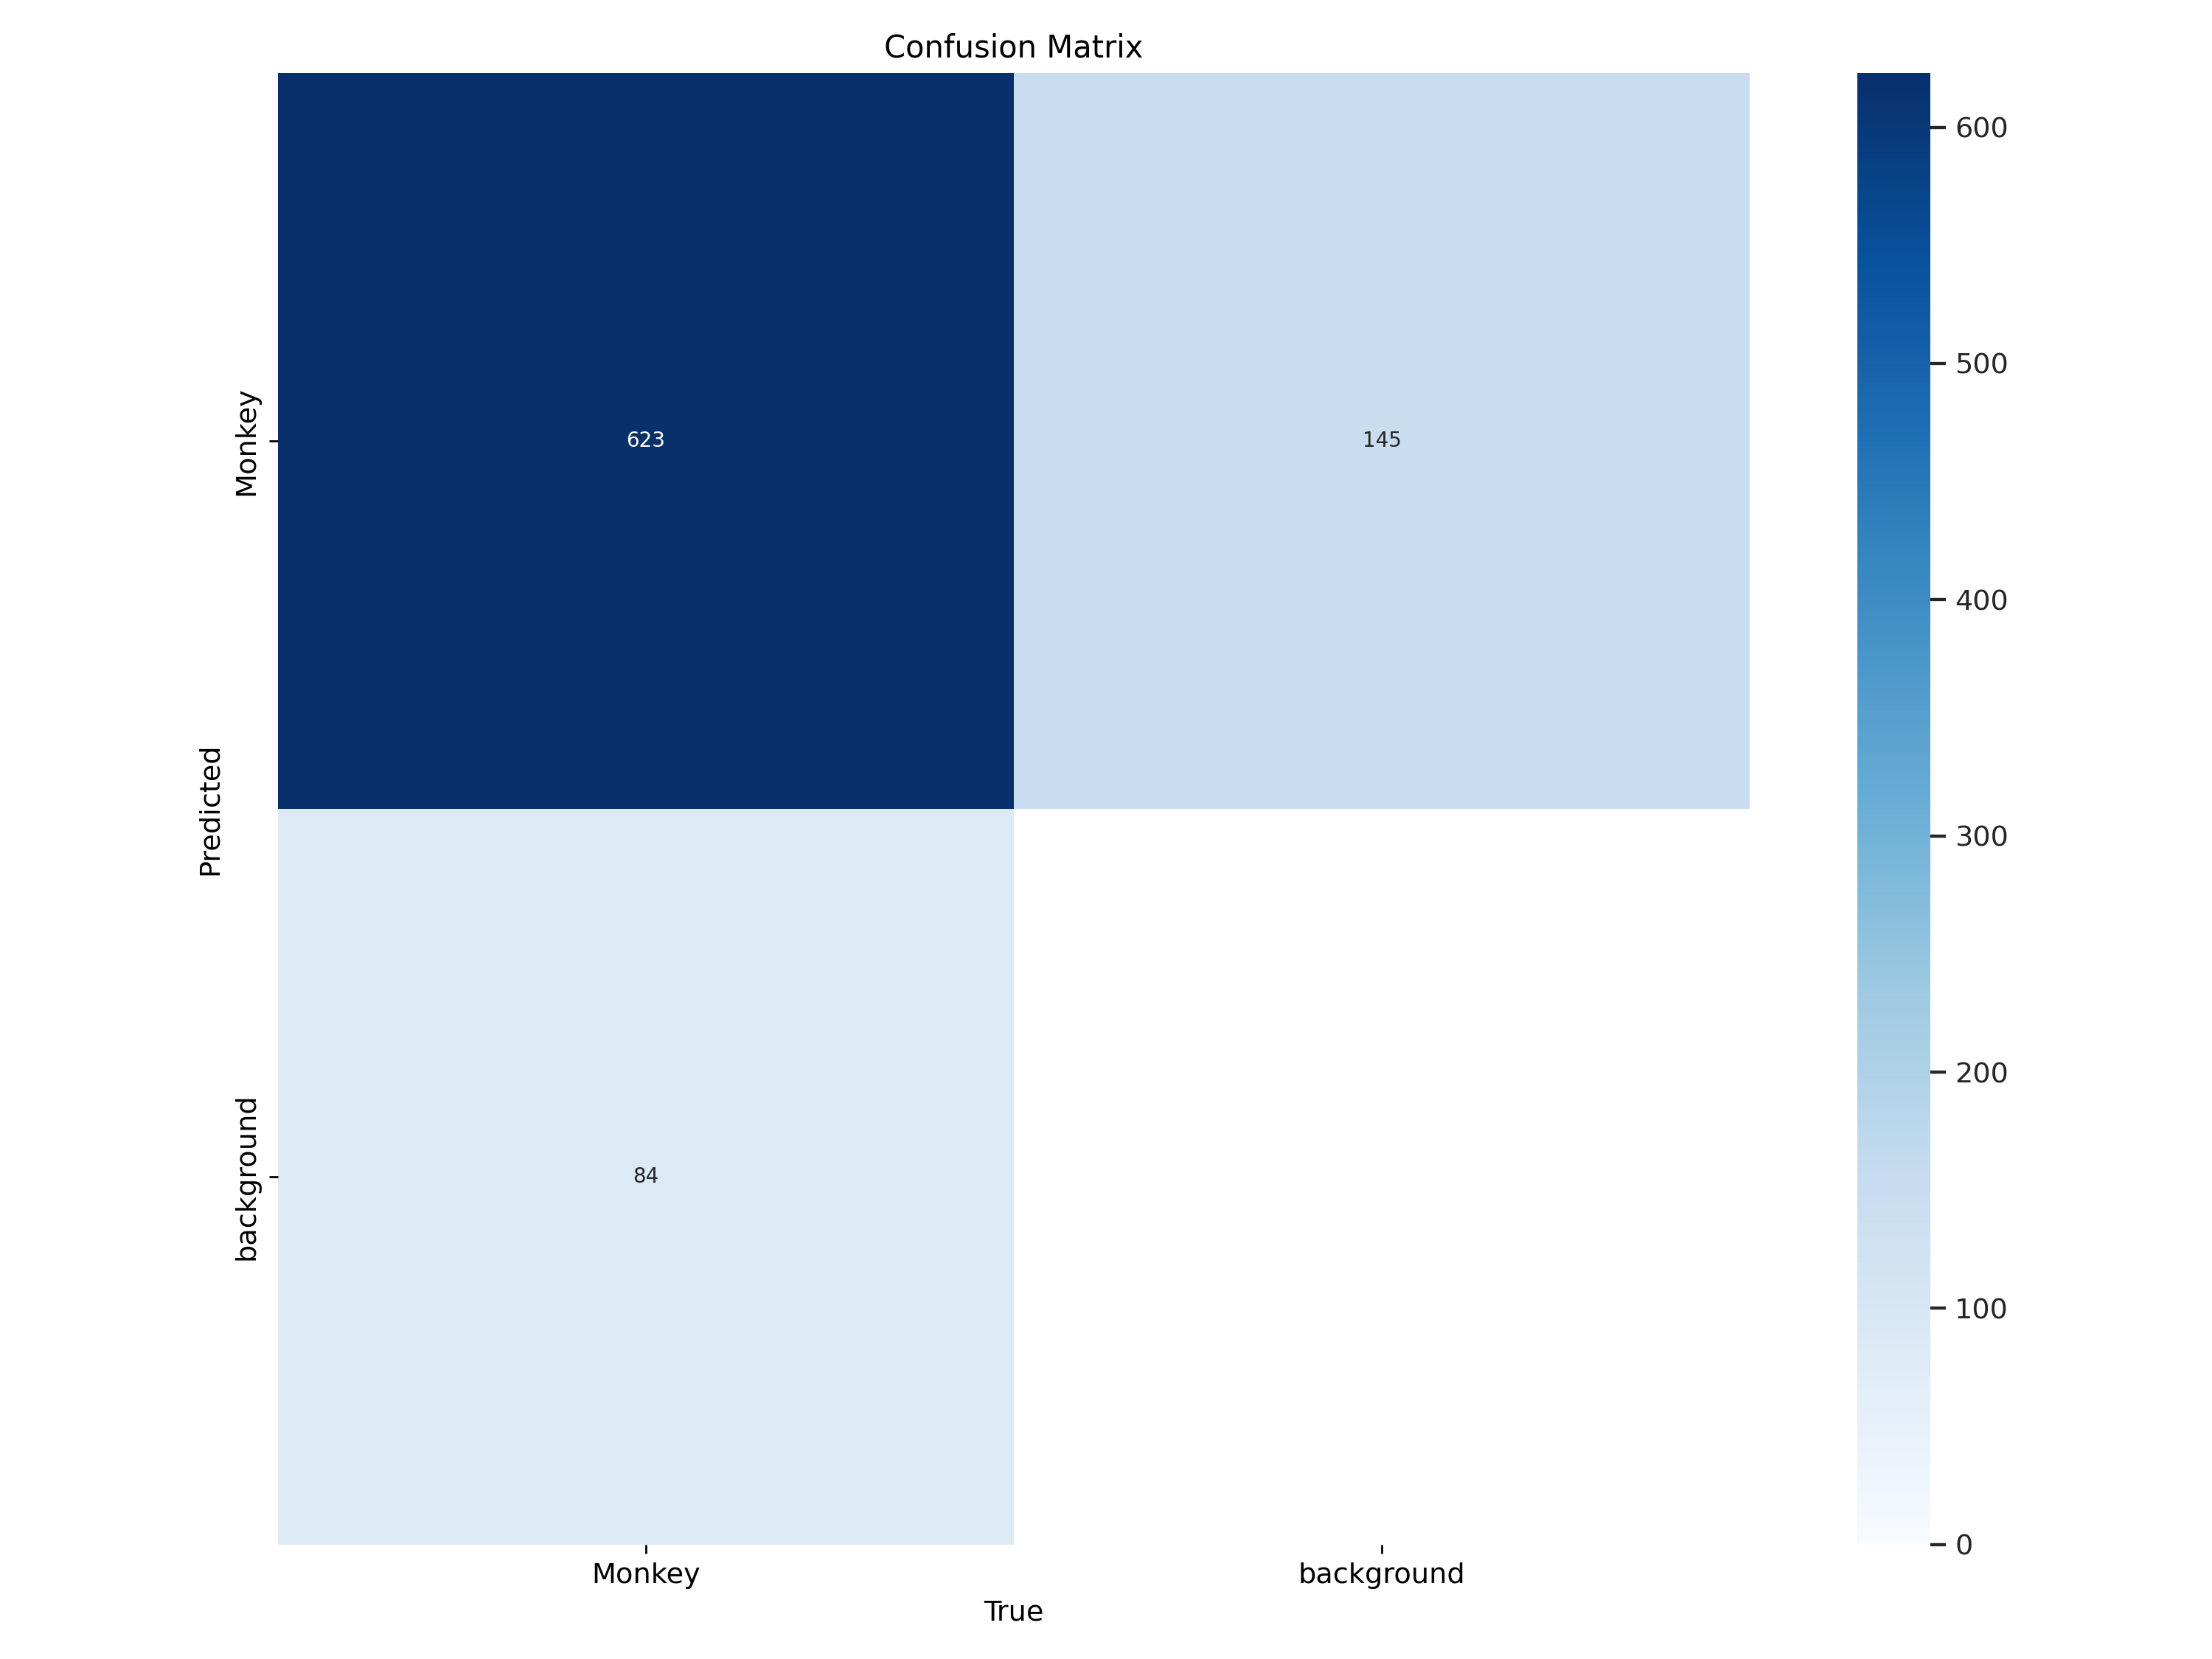

In [10]:
Image('/kaggle/working/runs/detect/train/confusion_matrix.png',width=800)

In [10]:
#dataset https://universe.roboflow.com/monkey-3byip/monkey-l6seo/dataset/10

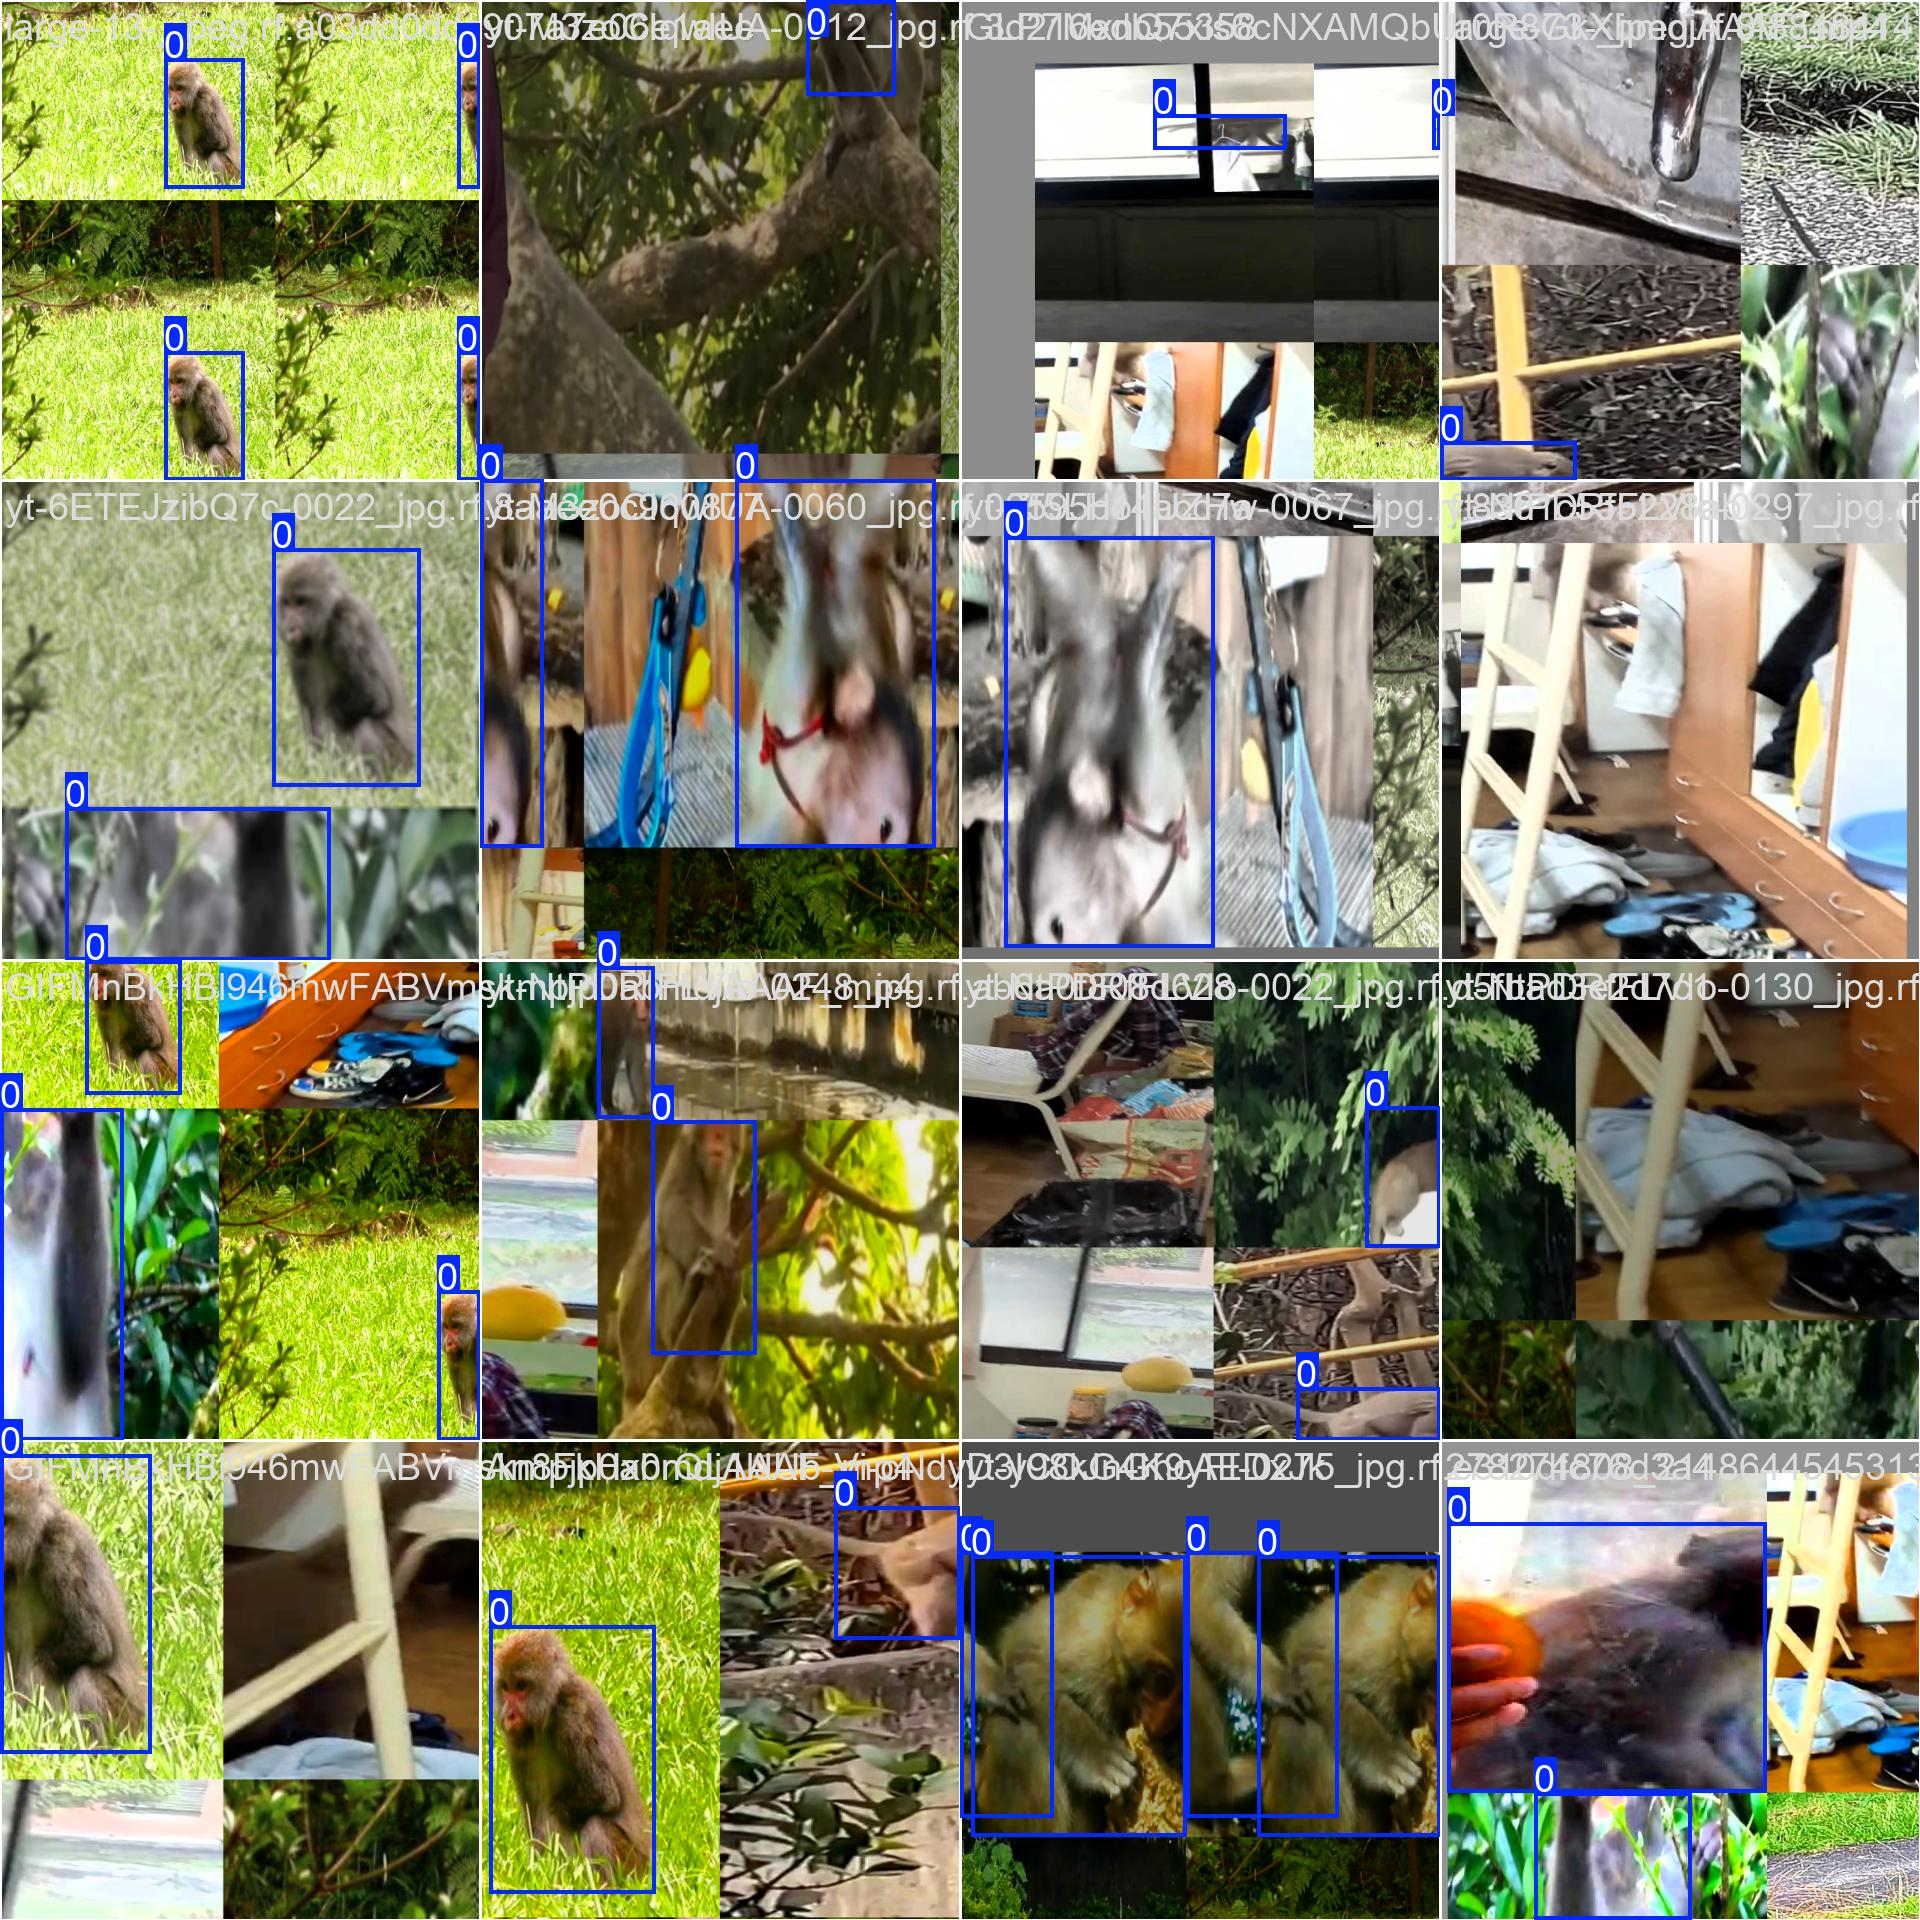

In [11]:
Image('/kaggle/working/runs/detect/train/train_batch0.jpg',width=800)

In [12]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Scanning /kaggle/working/Monkey-11/valid/labels.cache... 673 images, 122 ba
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        673        707      0.886        0.8        0.9      0.597
Speed: 0.6ms preprocess, 22.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/train/weights/best.pt' conf=.25 data={dataset.location}/test/images save=True source={dataset.location}/test/images

Ultralytics 8.3.28 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs

image 1/337 /kaggle/working/Monkey-11/test/images/-6-_jpg.rf.df33b6c7bace9a4a31f5a98635cb1cfb.jpg: 640x640 1 Monkey, 36.8ms
image 2/337 /kaggle/working/Monkey-11/test/images/-_-_mp4-0026_jpg.rf.47844ed8a18eb1af4bc6a5ba1e7ad696.jpg: 640x640 3 Monkeys, 36.8ms
image 3/337 /kaggle/working/Monkey-11/test/images/-_-_mp4-0038_jpg.rf.43b58443faa525c4a485de44b3c95757.jpg: 640x640 (no detections), 36.8ms
image 4/337 /kaggle/working/Monkey-11/test/images/0ce4349c55444785889143da3eed51f1_jpg.rf.d3457e165460f45b660a5b8748644d79.jpg: 640x640 1 Monkey, 36.7ms
image 5/337 /kaggle/working/Monkey-11/test/images/102375621_1320331174984031_1097454914030461409_n_jpg.rf.a4b4badc68ff0da68c6063f3e5cb87c1.jpg: 640x640 1 Monkey, 31.1ms
image 6/337 /kaggle/working/Monkey-11/test/images/20221011163559-3f1f047a283e3ec1c24e7cf24f30da00-w1200_jpeg.rf.2a5be2

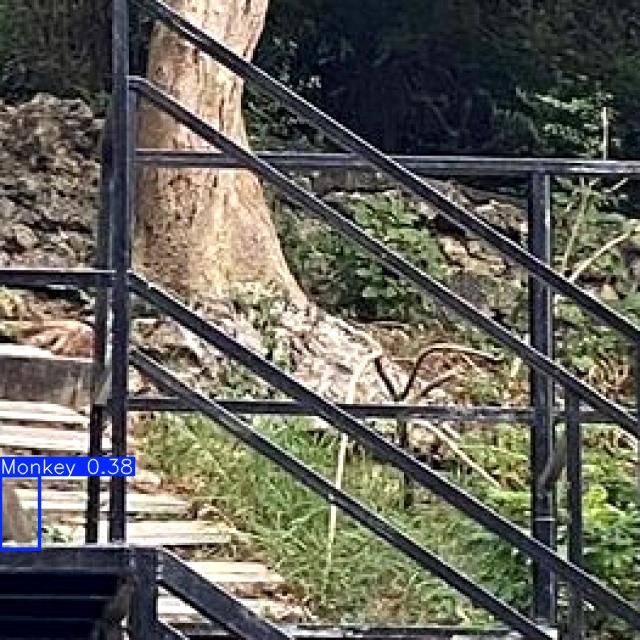

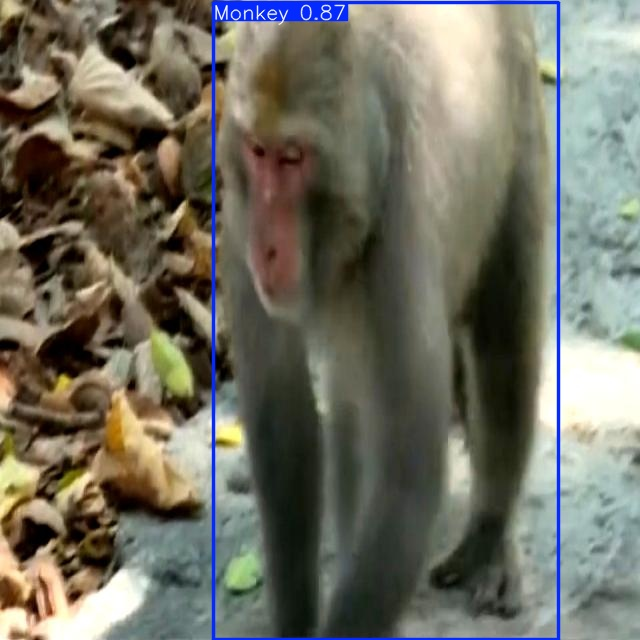

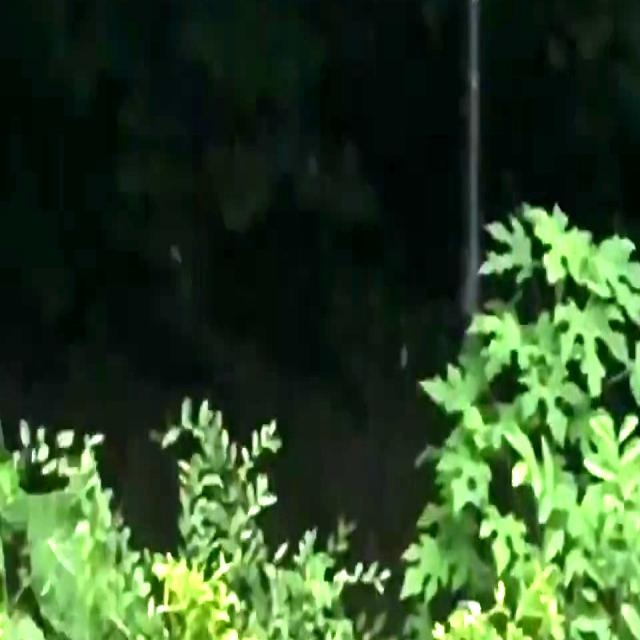

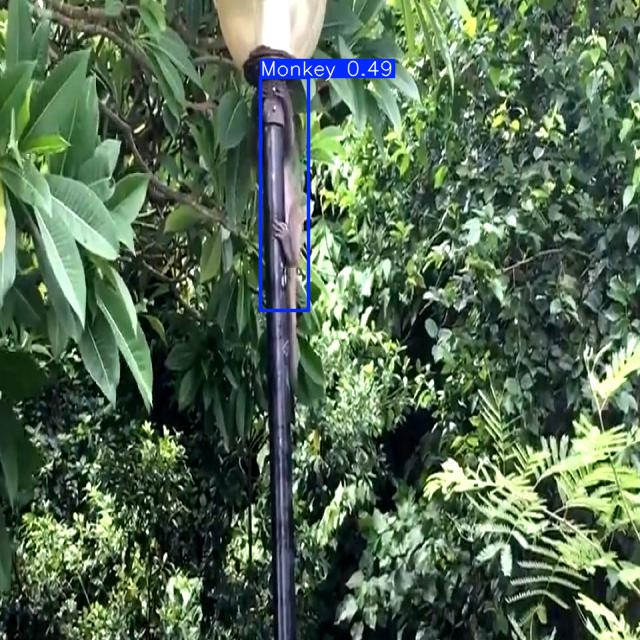

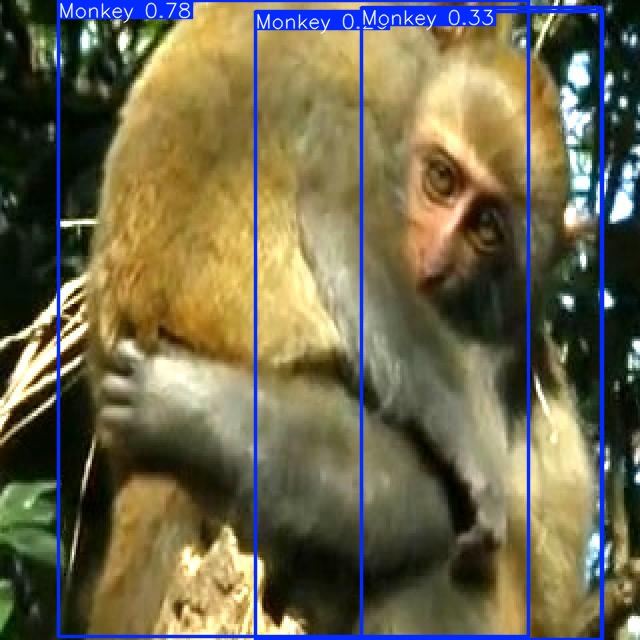

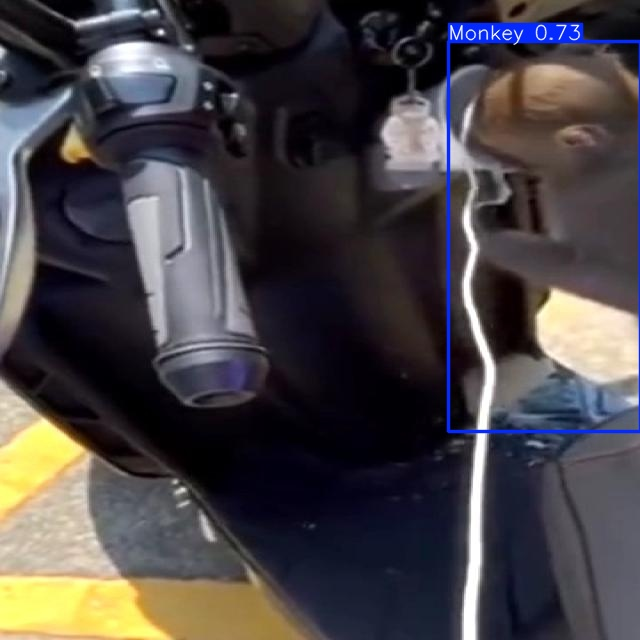

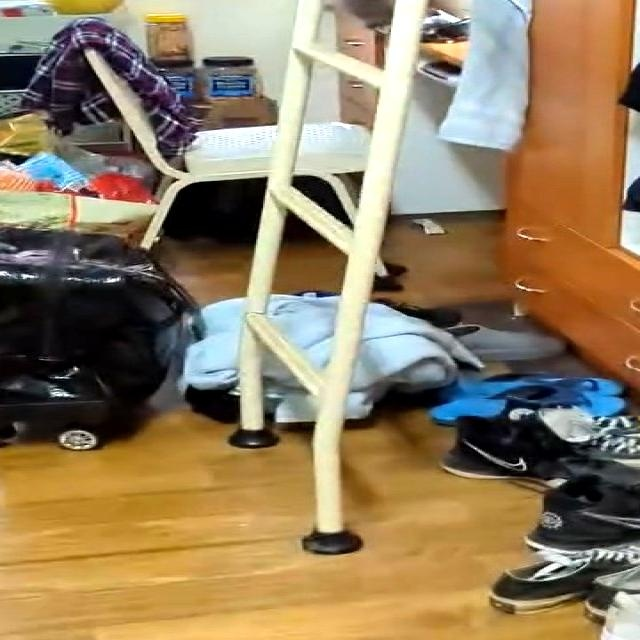

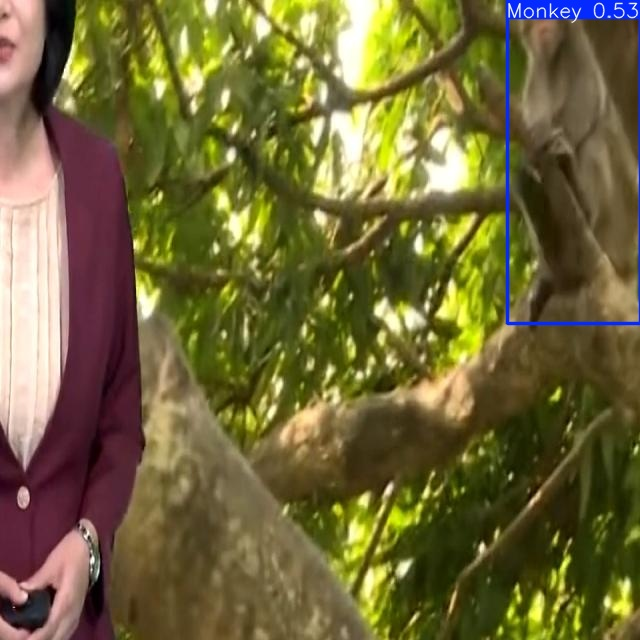

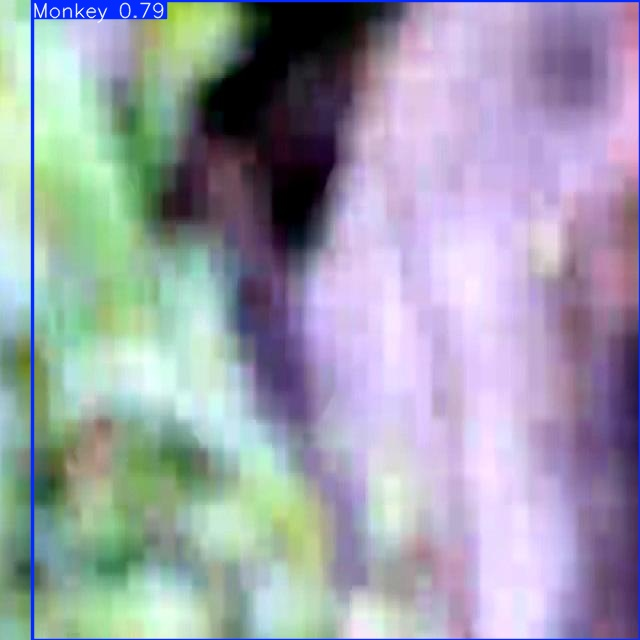

In [14]:
import glob
import os
from IPython.display import Image as IPyImage,display

latest=max(glob.iglob('/kaggle/working/runs/detect/predict*/'),key=os.path.getctime)
for img in glob.glob(f'{latest}/*jpg')[1:10]:
  display(IPyImage(filename=img,width=600))
  print('\n')